<a href="https://colab.research.google.com/github/Axelleazed/machine-learning-projects/blob/main/machine_learning_1Vegtable_fruit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing data base

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


#Data Preprocessing

##Training image Preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/vegetable_fruits_recognition/train',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 3115 files belonging to 36 classes.


##Validation images preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory (
    '/content/drive/MyDrive/vegetable_fruits_recognition/validation',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    )

Found 351 files belonging to 36 classes.


#Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

##building convolution layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation="relu"))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation="relu"))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))##avoid over fitiing

In [ ]:
#output layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling Training Phase

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                   

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 828s 8s/step - loss: 6.0168 - accuracy: 0.0433 - val_loss: 3.5581 - val_accuracy: 0.0769
Epoch 2/32
98/98 [==============================] - 139s 1s/step - loss: 3.4778 - accuracy: 0.0565 - val_loss: 3.2402 - val_accuracy: 0.2308
Epoch 3/32
98/98 [==============================] - 146s 1s/step - loss: 3.2465 - accuracy: 0.1278 - val_loss: 2.6061 - val_accuracy: 0.3875
Epoch 4/32
98/98 [==============================] - 143s 1s/step - loss: 2.9347 - accuracy: 0.1987 - val_loss: 2.1301 - val_accuracy: 0.5755
Epoch 5/32
98/98 [==============================] - 152s 1s/step - loss: 2.4183 - accuracy: 0.3387 - val_loss: 1.2793 - val_accuracy: 0.7749
Epoch 6/32
98/98 [==============================] - 143s 1s/step - loss: 1.8326 - accuracy: 0.4857 - val_loss: 1.0525 - val_accuracy: 0.7550
Epoch 7/32
98/98 [==============================] - 136s 1s/step - loss: 1.2584 - accuracy: 0.6417 - val_loss: 0.6452 - val_accuracy: 0.8718
Epoch 8/32
98

#saving the model

In [ ]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
training_history.history #return directory of history

NameError: name 'training_history' is not defined

In [1]:
#recording history
import json
with open('trainig_hist.json','w') as f:
  json.dump(training_history.history,f)

NameError: name 'training_history' is not defined

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#calculating accuracy of model achived on validation set

In [ ]:
print(f"validation_set_accuracy_is_{training_history.history['val_accuracy'][-1]*100}")

validation_set_accuracy_is_95.44159770011902


#accuracy visualization

##training visualization

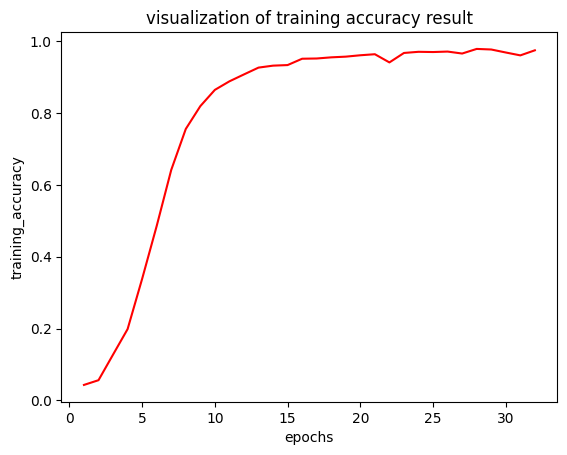

In [ ]:
epochs = [i for i in range (1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('epochs')
plt.ylabel('training_accuracy')
plt.title('visualization of training accuracy result')
plt.show()

##validation accuracy

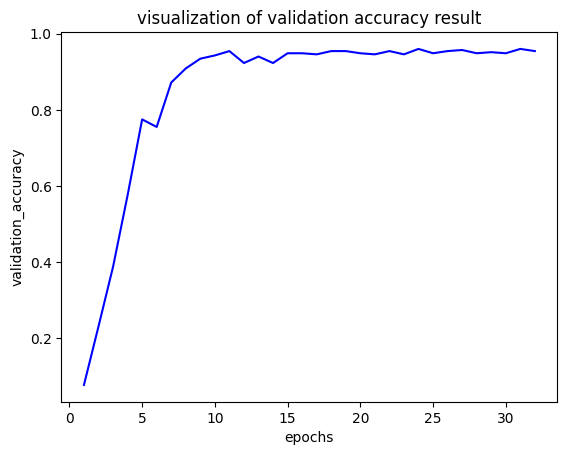

In [ ]:

plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('epochs')
plt.ylabel('validation_accuracy')
plt.title('visualization of validation accuracy result')
plt.show()